#                     Multi-Class Text Classification
## Classifying Consumer Finance Complaints into 12 pre-defined classes.

### Problem Formulation: 
Type of Machine Learning problem: supervised Multi-class text classification problem\
Our goal: investigate which supervised machine learning methods are best suited to solve it. \
Prediction: Given a new complaint, assign it to one of 12 categories.

### Dataset
Consumer Finance Complaints Data. The data can be downloaded from data.gov. \
'Consumer_Complaints.csv'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

### Data Exploration

In [9]:
import pandas as pd
original_df = pd.read_csv('complaints.csv')
original_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
3,2021-04-12,Credit card or prepaid card,Government benefit card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,NaN,Comerica,TX,758XX,Older American,NaN,Phone,2021-04-12,Closed with monetary relief,Yes,NaN,4291297
4,2019-05-23,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,Company has responded to the consumer and the ...,MIDFIRST BANK,AZ,85254,NaN,NaN,Referral,2019-05-28,Closed with explanation,Yes,NaN,3255455


In [10]:
total_rows = original_df.shape[0]
print(total_rows)

2069893


In [ ]:
### USUAL EAD ###
print(dataset.shape)
# head
print(dataset.head(20))
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())

### Data Transformation
For this project, we need only two columns — “Product” and “Consumer complaint narrative”.We will also remove missing values in “Consumer complaints narrative” column  

In [11]:
col = ['Product', 'Consumer complaint narrative']
original_df = original_df[col]
original_df = original_df[pd.notnull(original_df['Consumer complaint narrative'])]
original_df.columns = ['Product', 'Consumer_complaint_narrative']
original_df['category_id'] = original_df['Product'].factorize()[0]
original_df.head()

,Product,Consumer_complaint_narrative,category_id
0,Debt collection,transworld systems inc. \nis trying to collect...,0
2,Debt collection,"Over the past 2 weeks, I have been receiving e...",0
5,"Credit reporting, credit repair services, or o...",I am a victim of identity theft. My personal i...,1
9,"Credit reporting, credit repair services, or o...","Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...",1
10,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...,1


In [12]:
total_rows = original_df.shape[0]
print(total_rows)

#Get a stratified sample (5 %)
sample_df = original_df.groupby('category_id').apply(lambda x: x.sample(frac=0.05))
print(sample_df.shape[0])
counts = sample_df['Product'].value_counts()
#print (counts)

df = sample_df[~sample_df['Product'].isin(counts[counts < 20].index)]
counts = df['Product'].value_counts()
print (counts)
print(sample_df.shape[0])


709037
35451
Credit reporting, credit repair services, or other personal consumer reports    13140
Debt collection                                                                  6999
Mortgage                                                                         3884
Credit card or prepaid card                                                      2652
Credit reporting                                                                 1579
Checking or savings account                                                      1564
Student loan                                                                     1406
Credit card                                                                       942
Bank account or service                                                           744
Money transfer, virtual currency, or money service                                705
Vehicle loan or lease                                                             648
Consumer Loan                            

Create "Category to ID" and "ID to Category" dictionaries

In [17]:
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('Product')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
category_to_id

{'Bank account or service': 12,
 'Checking or savings account': 7,
 'Consumer Loan': 10,
 'Credit card': 8,
 'Credit card or prepaid card': 6,
 'Credit reporting': 13,
 'Credit reporting, credit repair services, or other personal consumer reports': 1,
 'Debt collection': 0,
 'Money transfer, virtual currency, or money service': 2,
 'Money transfers': 15,
 'Mortgage': 3,
 'Payday loan': 11,
 'Payday loan, title loan, or personal loan': 9,
 'Prepaid card': 16,
 'Student loan': 5,
 'Vehicle loan or lease': 4}

### DATA VISUALIZATION

Usually look at two types of plots:\

1. Univariate plots to better understand each attribute.\
2. Multivariate plots to better understand the relationships between attributes.

In [ ]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
# histograms
dataset.hist()
pyplot.show()


# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

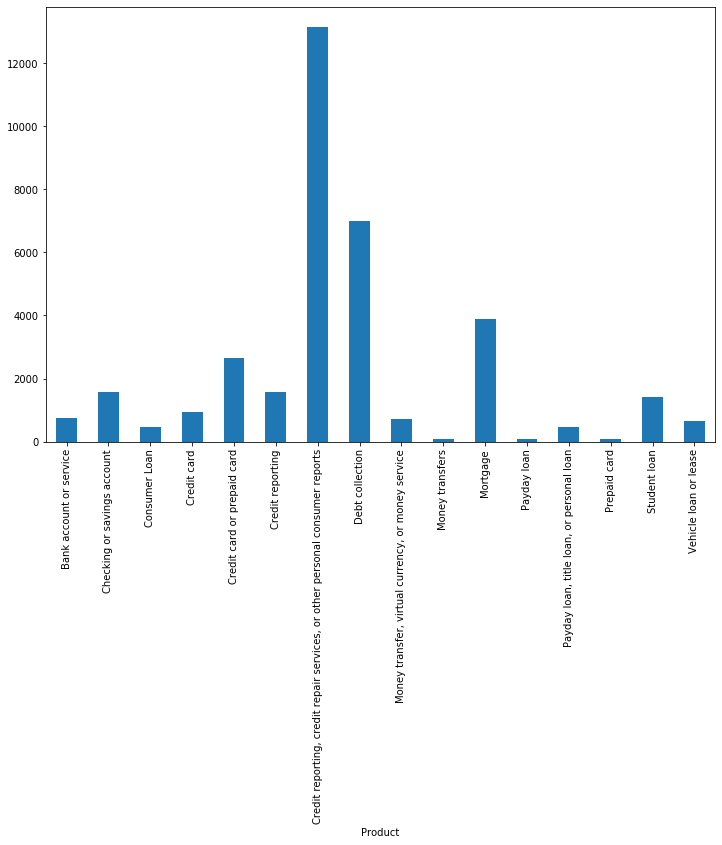

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12,8))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

### ToDo: Imbalanced Classes
Undersampling majority classes \
Oversampling Minority classes: SMOTE 

### ToDo: Pre-processing
Convert to lowercase \
remove stop words \
Remove non-words, punctuation \
convert numbers to <num> or 'ddd' token \
Do stemmimg 

### Text to Vector
Various approaches:\
1. Bag of Words with Count or Tf-Idf Features
2. Word Embeddings - Word 2 Vec, Glove, BERT etc

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000, min_df=5, sublinear_tf=True, norm='l2', encoding='latin-1', lowercase=True, ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
print(features.shape)


(35435, 2000)


In [50]:
print(features[0:5])

[[0.16861806 0.         0.         ... 0.         0.         0.        ]
 [0.08368904 0.         0.         ... 0.         0.         0.        ]
 [0.05097482 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.10833926 0.         0.         ... 0.         0.         0.        ]]


### Correlation: unigrams and bigrams with classes

In [22]:
from sklearn.feature_selection import chi2
import numpy as np
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. branch
. bank
. overdraft
  . Most correlated bigrams:
. debit card
. checking account
. overdraft fees
# 'Checking or savings account':
  . Most correlated unigrams:
. bank
. branch
. deposit
  . Most correlated bigrams:
. overdraft fees
. savings account
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. ally
. vehicle
. car
  . Most correlated bigrams:
. loan xxxx
. financial services
. auto loan
# 'Credit card':
  . Most correlated unigrams:
. amex
. citi
. card
  . Most correlated bigrams:
. synchrony bank
. american express
. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. capital
. express
. card
  . Most correlated bigrams:
. card company
. american express
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. transunion
. equifax
. experian
  . Most correlated bigrams:
. credit report
. public record
. trans union
# 'Credit reporting, credit repair service

### Split data into train, validate, test

In [90]:
X = df['Consumer_complaint_narrative']
y = df['Product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.25,  stratify=y_train, random_state=1) # 0.25 x 0.8 = 0.2
    
    
print(len(X_train))
print(len(X_train_sub))
print(len(X_val))
print(len(X_test))

28348
21261
7087
7087


In [91]:
tfidf = TfidfVectorizer(max_features=2000, min_df=5, sublinear_tf=True, norm='l2', encoding='latin-1', lowercase=True, ngram_range=(1, 2), stop_words='english')
X_train_tfIdf = tfidf.fit_transform(X_train)
X_test_tfIdf = tfidf.fit_transform(X_test)

### Train and Compare different models

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

features = X_train_tfIdf 
labels = y_train

models = [
    RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1),
    LinearSVC(random_state=1),
    MultinomialNB(),
    LogisticRegression(random_state=1, max_iter=1000),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  kfold = StratifiedKFold(n_splits=CV, random_state=1, shuffle=True)
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=kfold)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

## Try F1 score etc (micro-average, macro average)
#Micro-average preferred in class imbalance situation

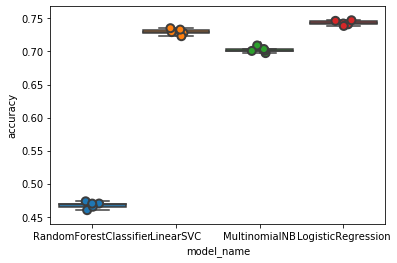

<Figure size 432x288 with 0 Axes>

In [124]:

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.figure(2)
plt.show()

In [125]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.729752
LogisticRegression        0.743121
MultinomialNB             0.702484
RandomForestClassifier    0.467687
Name: accuracy, dtype: float64

### Train and Tune the better performing model: 

In [126]:
clf = LinearSVC(random_state=1).fit(features, labels)
#clf = LogisticRegression(random_state=1, max_iter=1000).fit(features, labels)

### Do Hyperparameter Tuning 
Grid search or other ways

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(features,labels)

In [ ]:
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test_tfIdf)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

In [130]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':np.arange(0.01,100,10)}

linearSVC = GridSearchCV(LinearSVC(),param_grid,cv=5,return_train_score=True)
linearSVC.fit(features,labels)

print(linearSVC.best_params_)

/Users/shail/ml_env/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shail/ml_env/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shail/ml_env/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shail/ml_env/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shail/ml_env/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

{'C': 0.01}


In [133]:
bestlinearSVC = linearSVC.best_estimator_
best_model = bestlinearSVC.fit(features,labels)
clf = best_model
#bestlinearSVC.coef_ = bestlinearSVC.named_steps['SVC'].coef_
#bestlinearSVC.score(features,labels)

### Test on a sample 

In [138]:
test_complaint = list(X_test)[1]
print(test_complaint)
true_label = list(y_test)[1]
print('\nTrue Label : {}'.format(true_label))


doc_vector = tfidf.transform([test_complaint])
result = clf.predict(doc_vector)
print('\nPrecited Label : {}'.format(result[0]))
 

Credco Inquiry from XX/XX/XXXX I spoke to CREDCO They told me that the account CLOSED and they contacted all credit agencies. They told me that they had to " Re-Open '' the case and find out why it was not removed they pulled my credit on XX/XX/XXXX without consent nor permission. XXXX XXXX never responded and failed to provide " Factual Records ''. They also pulled my credit on XX/XX/XXXX and again on XX/XX/XXXX in 30 days that " XXXX '' " XXXX '' AND " XXXX '' Delete this from my records. Please see the attached Information from CREDCO and you can CONTACT Them directly to verify this was " removed '' yet you guys failed to remove it from my credit file I want " all three removed '' from my credit report in 30 days or Ill seek damages caused. They have submitted this request in XX/XX/XXXX and should of been removed then, CREDCO Claims they sent out all documents and request for removal. I checked my credit report and its still on my account. You have 30 days before I seek damages as t

In [135]:
y_pred = clf.predict(X_test_tfIdf)

In [136]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.3883166360942571
[[   1    6    0    4    3    1   94   34    1    0    5    0    0    0
     0    0]
 [   1   13    0    1   13    0  229   49    1    0    5    0    0    0
     0    1]
 [   0    1    0    2    2    1   54   26    0    0    8    0    0    0
     1    0]
 [   2    0    0    3    8    0  106   60    0    0    8    0    0    0
     0    1]
 [   0    4    0    0   35    0  369  102    1    0   18    0    0    0
     1    0]
 [   0    2    0    1    6    5  197   93    0    0   10    0    0    0
     2    0]
 [   0    7    0    2   25    4 1896  643    0    0   44    0    0    0
     3    4]
 [   0    6    0    4   29    5  659  620    5    0   71    0    0    0
     1    0]
 [   0    3    0    1    7    0   86   37    4    0    3    0    0    0
     0    0]
 [   0    0    0    0    0    0    7    7    1    0    0    0    0    0
     0    0]
 [   0    2    0    3   15    1  457  125    0    0  173    0    0    0
     1    0]
 [   0    0    0    0    3    0    7    7    0

/Users/shail/ml_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shail/ml_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shail/ml_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Checking or savings account' predicted as 'Bank account or service' : 22 examples.


Product  \
category_id                                        
7           220974   Checking or savings account   
            150541   Checking or savings account   
            886589   Checking or savings account   
            50857    Checking or savings account   
            866447   Checking or savings account   
            1033090  Checking or savings account   
            308148   Checking or savings account   
            1949580  Checking or savings account   
            51654    Checking or savings account   
            2034220  Checking or savings account   
            224497   Checking or savings account   
            902840   Checking or savings account   
            1056203  Checking or savings account   
            1001751  Checking or savings account   
            919764   Checking or savings account   
            1997213  Checking or savings account   
            1058566  Checking or savings account   
            1001418  Checking or savings account   
            68059    Checking or savings account   
            347204   Checking or savings account   
            132880   Checking or savings account   
            878499   Checking or savings account   

                                          Consumer_complaint_narrative  
category_id                                                             
7           220974   I have previously submitted the same complaint...  
            150541   I have a Bank of America debit card and it was...  
            886589   Bank of America has blocked all my access to b...  
            50857    On XX/XX/2017, my house was broken in and {$60...  
            866447   Chase Bank Owes me {$290.00} for services not ...  
            1033090  OnXX/XX/XXXX, at the drive through window of U...  
            308148   I live in XXXX XXXX, tried to use my debit car...  
            1949580  Citibank has started assessing overdraft fees ...  
            51654    To whom it may concern : There is someone stea...  
            2034220  Bank did not properly disclose an excessive fe...  
            224497   I signed up for a checking account at https : ...  
            902840   On XX/XX/XXXX I wrote a check to be given to m...  
            1056203  My original complaint against Citizens Bank wa...  
            1001751  When I opened up my account in 2014 never rece...  
            919764   I am the durable power of attorney for my elde...  
            1997213  I was supposed to receive an account opening b...  
            1058566  Hello, It is time to do my XX/XX/XXXX taxes an...  
            1001418  My debit card ending in XXXX - was fraudulentl...  
            68059    Dear CFPB - I want to report TCF Bank Illinois...  
            347204   I reported to the bank when I found several tr...  
            132880   I had a Citizens Bank Checking Account number ...  
            878499   On Monday  XXXX   XXXX  I went in to Chase Pri...

IndexError: index 16 is out of bounds for axis 0 with size 16